In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [7]:
df = pd.read_csv('./data/Monthly_data_cmo.csv', parse_dates=['date'])
df.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,Maharashtra


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
APMC               62429 non-null object
Commodity          62429 non-null object
Year               62429 non-null int64
Month              62429 non-null object
arrivals_in_qtl    62429 non-null int64
min_price          62429 non-null int64
max_price          62429 non-null int64
modal_price        62429 non-null int64
date               62429 non-null object
district_name      62429 non-null object
state_name         62429 non-null object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [13]:
df.drop(['Year', 'Month', 'state_name'], axis=1, inplace=True)

In [14]:
df.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
62248,Ahmednagar,BAJRI,298,1453,1810,1648,2016-11-01,Ahmadnagar
62272,Ahmednagar,BITTER GOURD,55,625,2025,1325,2016-11-01,Ahmadnagar
62257,Ahmednagar,BLACK GRAM,883,5884,6822,6433,2016-11-01,Ahmadnagar
62264,Ahmednagar,BOTTLE GOURD,65,225,725,475,2016-11-01,Ahmadnagar
62277,Ahmednagar,BRINJAL,222,333,1617,975,2016-11-01,Ahmadnagar


In [29]:
df = df.applymap(lambda x: x.strip().upper() if (type(x)==str) else x)
df.head()

,Commodity,district_name,APMC,date,arrivals_in_qtl,min_price,max_price,modal_price
3955,BAJRI,AHMADNAGAR,AHMEDNAGAR,2014-09-01,24,1400,1750,1575
3134,BAJRI,AHMADNAGAR,AHMEDNAGAR,2014-11-01,395,1507,1750,1629
1388,BAJRI,AHMADNAGAR,AHMEDNAGAR,2015-01-01,97,1472,1764,1618
1045,BAJRI,AHMADNAGAR,AHMEDNAGAR,2015-02-01,10,1500,1800,1650
2470,BAJRI,AHMADNAGAR,AHMEDNAGAR,2015-03-01,14,1350,1700,1525


In [30]:
df = df[['Commodity', 'district_name', 'APMC', 'date', 'arrivals_in_qtl', 'min_price', 'max_price', 'modal_price']]
df.sort_values(by=['district_name', 'APMC', 'Commodity', 'date'], inplace=True)
df.head()

,Commodity,district_name,APMC,date,arrivals_in_qtl,min_price,max_price,modal_price
3955,BAJRI,AHMADNAGAR,AHMEDNAGAR,2014-09-01,24,1400,1750,1575
3134,BAJRI,AHMADNAGAR,AHMEDNAGAR,2014-11-01,395,1507,1750,1629
1388,BAJRI,AHMADNAGAR,AHMEDNAGAR,2015-01-01,97,1472,1764,1618
1045,BAJRI,AHMADNAGAR,AHMEDNAGAR,2015-02-01,10,1500,1800,1650
2470,BAJRI,AHMADNAGAR,AHMEDNAGAR,2015-03-01,14,1350,1700,1525


In [31]:
df.to_csv('cleaned-data-2.csv')

In [32]:
x = df.Commodity.unique()
x.sort()
print(x)

['AMBA KOY' 'AMBAT CHUKA' 'AMLA' 'APPLE' 'ARVI' 'ASTER' 'AWALA' 'BAJRI'
 'BANANA' 'BANANA(RAW)' 'BARU SEED' 'BATBATI' 'BEDANA' 'BEET ROOT'
 'BETELNUTS' 'BHAGAR/VARI' 'BIJLI' 'BITTER GOURD' 'BLACK GRAM' 'BOR'
 'BOTTLE GOURD' 'BRINJAL' 'BUFFALO' 'BULLACK' 'BULLOCK HEART' 'CABBAGE'
 'CAPSICUM' 'CARDAMOM' 'CARROT' 'CASHEWNUTS' 'CASTOR SEED' 'CHANDANI'
 'CHAVLI (PALA)' 'CHAVLI (SHENGA )' 'CHIKOO' 'CHILLIES(RED)' 'CHINO'
 'CLUSTER BEAN' 'COCONUT' 'CORIANDER' 'CORIANDER (DRY)' 'COTTON' 'COW'
 'COWPEA' 'CUCUMBER' 'CUMMIN' 'CURRY LEAVES' 'CUSTARD APPLE' 'DHEMSE'
 'DOUBLE BEE' 'ELEPHANT ROOT' 'FARSHI' 'FENNEL' 'FENUGREEK' 'FIG' 'FLOWER'
 'FODDER' 'FRENCH BEAN' 'GARLIC' 'GHEE' 'GHEVDA' 'GHEVDA SEED'
 'GHOSALI(BHAJI)' 'GINGER (DRY)' 'GINGER (FRESH)' 'GOATS' 'GOOSEFOOT'
 'GR.NUT KERNELS' 'GRAM' 'GRAPES' 'GREEN CHILLI' 'GREEN GRAM'
 'GREEN PEAS (DRY)' 'GREEN-PEAS' 'GROUND NUT PODS (DRY)'
 'GROUNDNUT PODS (WET)' 'GUAVA' 'GULCHADI' 'GUVAR' 'HARBARA(BHAJI)'
 'HARBARA(PENDI)' 'HE BUFFALO' 'HEMP' 'HEMP-S

In [38]:
for crop in df.Commodity.unique():
    print(crop, df.loc[df.Commodity==crop].shape[0])

BAJRI 2346
BITTER GOURD 822
BLACK GRAM 1675
BOTTLE GOURD 596
BRINJAL 1008
CABBAGE 893
CAPSICUM 656
CARROT 479
CASTOR SEED 195
CHAVLI (SHENGA ) 303
CHIKOO 341
CHILLIES(RED) 501
CLUSTER BEAN 701
CORIANDER 459
CORIANDER (DRY) 330
COWPEA 248
CUCUMBER 835
CUSTARD APPLE 157
FLOWER 824
GARLIC 580
GHEVDA 351
GHOSALI(BHAJI) 201
GINGER (FRESH) 518
GRAM 4115
GREEN CHILLI 844
GREEN GRAM 2425
GREEN PEAS (DRY) 228
GROUND NUT PODS (DRY) 1068
HORSE GRAM 180
JAGGERY 386
LADIES FINGER 921
LEMON 421
MAIZE 2546
MAIZE (CORN.) 1
MAIZE(CORN.) 124
MANGO 134
MANGO(RAW) 109
MATH (BHAJI) 161
MATKI 321
MOSAMBI 350
MUSTARD 216
ONION 1872
ORANGE 250
PIGEON PEA (TUR) 3477
POMEGRANATE 565
POTATO 718
SORGUM(JAWAR) 3716
SOYBEAN 3727
SPINACH 349
SQUASH GOURD 243
TAMARIND 228
TAMARIND SEED 47
TOMATO 1021
WATER MELON 153
WHEAT(HUSKED) 4097
BHAGAR/VARI 30
HILDA 5
PADDY-UNHUSKED 911
COTTON 1063
CHINO 23
BEET ROOT 211
BOR 165
CURRY LEAVES 92
DHEMSE 115
GRAPES 159
KANDA PAT 145
KARDAI 31
KHARBUJ 74
MELON 108
PAPAI 308
SHEPU 1

In [37]:
for apmc in df.APMC.unique():
    print(apmc, df.loc[df.APMC==apmc].shape[0])

AHMEDNAGAR 649
AKOLE 189
JAMKHED 203
KARJAT (A- NAGAR) 2
KOPARGAON 225
NEWASA 130
NEWASA-GHODEGAON 27
PARNER 27
PATHARDI 164
RAHATA 848
RAHURI 192
RAHURI-SONGAON 19
RAHURI-VAMBORI 271
SANGAMNER 274
SHEVGAON 153
SHEVGAON-BODHEGAON 139
SHRIGONDA 88
SHRIGONDA-GHOGARGAON 8
SHRIRAMPUR 947
SHRIRAMPUR-BELAPUR 83
AKOLA 248
AKOT 196
BALAPUR 172
BARSHI TAKLI 6
MURTIZAPUR 143
PATUR 127
TELHARA 192
ACHALPUR 195
AMARAWATI 817
AMARAWATI-FRUIT AND VEGETABLES 292
ANAJNGAON SURJI 233
CHANDUR BAJAR 136
CHANDUR RLY. 106
DARYAPUR 155
DHAMANGAON-RLY 115
DHARNI 68
MORSHI 149
NANDGAON KHANDESHWAR 101
TIWASA 4
VARUD 54
VARUD-RAJURA BAZAR 165
AURANGABAD 918
FULAMBRI 20
GANGAPUR 197
KANNAD 140
KHULTABAD 15
LASUR STATION 249
PAITHAN 141
SILLOD 145
SILLOD-BHARADI 121
SOYGAON 23
VAIJAPUR 343
AMBEJOGAI 207
BEED 202
GEVRAI 312
KADA 253
KADA (ASHTI) 78
KEJ 221
KILLE DHARUR 215
MAJALGAON 216
PARLI-VAIJNATH 208
VADVANI 4
BHANDARA 146
LAKHANDUR 61
LAKHANI 13
PAVANI 47
TUMSAR 273
BULDHANA 168
BULDHANA-DHAD 38
CHIKHALI 18

KeyboardInterrupt: 

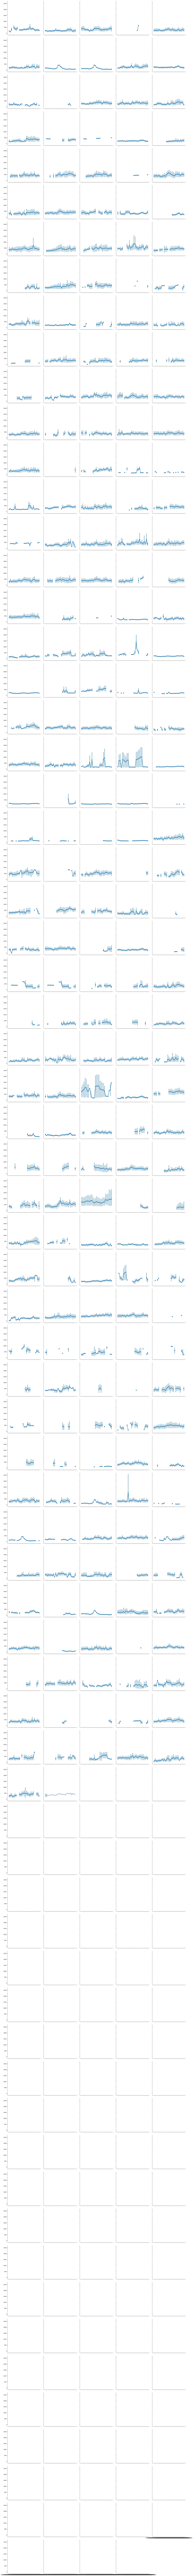

In [39]:
# sb.catplot(data=df, kind='point', x='date', y='modal_price', col='APMC', col_wrap=5)

In [53]:
ahmednagar = pd.DataFrame(df.loc[df.APMC=='AHMEDNAGAR'])
ahmednagar.head()

,Commodity,district_name,APMC,date,arrivals_in_qtl,min_price,max_price,modal_price
3955,BAJRI,AHMADNAGAR,AHMEDNAGAR,2014-09-01,24,1400,1750,1575
3134,BAJRI,AHMADNAGAR,AHMEDNAGAR,2014-11-01,395,1507,1750,1629
1388,BAJRI,AHMADNAGAR,AHMEDNAGAR,2015-01-01,97,1472,1764,1618
1045,BAJRI,AHMADNAGAR,AHMEDNAGAR,2015-02-01,10,1500,1800,1650
2470,BAJRI,AHMADNAGAR,AHMEDNAGAR,2015-03-01,14,1350,1700,1525


In [42]:
ahmednagar.size

5192

In [57]:
ahmednagar.sort_values(by=['date'], inplace=True)

ahmednagar.head()

,Commodity,district_name,APMC,date,arrivals_in_qtl,min_price,max_price,modal_price
3955,BAJRI,AHMADNAGAR,AHMEDNAGAR,2014-09-01,24,1400,1750,1575
3960,SORGUM(JAWAR),AHMADNAGAR,AHMEDNAGAR,2014-09-01,42,1600,2601,2100
3517,ONION,AHMADNAGAR,AHMEDNAGAR,2014-10-01,10903,100,2350,1225
3140,MAIZE,AHMADNAGAR,AHMEDNAGAR,2014-11-01,277,1454,1484,1469
3143,GRAM,AHMADNAGAR,AHMEDNAGAR,2014-11-01,323,2307,2732,2519


In [41]:
ahmednagar.Commodity.unique().size

55

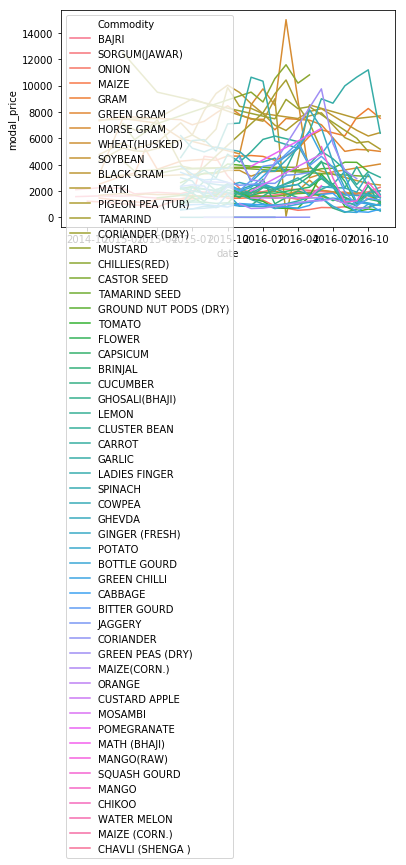

In [58]:
sb.lineplot(data=ahmednagar, x='date', y='modal_price', hue='Commodity')

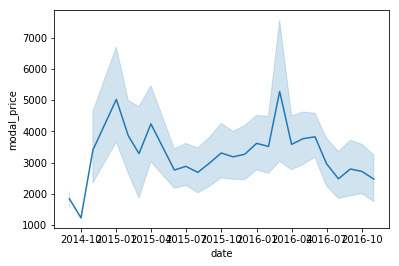

In [59]:
sb.lineplot(data=ahmednagar, x='date', y='modal_price')

In [60]:
bajri = pd.DataFrame(df.loc[df.Commodity=='BAJRI'])
bajri.sort_values(by='date', inplace=True)
bajri.head()

,Commodity,district_name,APMC,date,arrivals_in_qtl,min_price,max_price,modal_price
3955,BAJRI,AHMADNAGAR,AHMEDNAGAR,2014-09-01,24,1400,1750,1575
11877,BAJRI,BEED,KADA (ASHTI),2014-09-01,6,1250,1365,1255
11888,BAJRI,BEED,KEJ,2014-09-01,35,1342,1492,1359
11921,BAJRI,BEED,KILLE DHARUR,2014-09-01,121,1389,1687,1516
11948,BAJRI,BEED,MAJALGAON,2014-09-01,402,1107,1559,1315


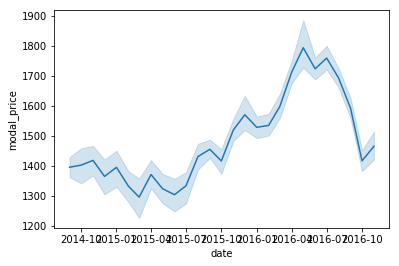

In [61]:
sb.lineplot(data=bajri, x='date', y='modal_price')